# DSPT-04 Phase 1 Project Submission

Please fill out:
* Student name: ANGEL LINAH ATUNGIRE 
* Student pace: Part Time 
* Instructor name: MARYAN MWIKALI

### Overview
In this project, I will be using exploratory data analysis to generate insights for a business stakeholder.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I was charged with exploring what types of films are currently doing the best at the box office. I then had to translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. 

We can explore the following data questions:

1. *Which film genres have the highest rating?*
   
2. *What is the relationship between budget and movie success?*
  
3. *How does the release period impact the movie performance?*
   
4. *Do audience ratings correlate with film performance?*
  

### Data Understanding.
The data used for this project includes relevant information about films, such as genre, budget, release date, revenue, and audience ratings. I then performed exploratory data analysis, applying various statistical techniques and data visualization methods to uncover insights. These insights can be translated into actionable recommendations for Microsoft's movie studio, helping them decide on the types of films to create based on the findings.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
#import the different datasets to be used
imdb_title_df = pd.read_csv('title.basics.csv')
imdb_ratings_df = pd.read_csv('title.ratings.csv')
bom_df = pd.read_csv('bom.movie_gross.csv')
tm_df = pd.read_csv('tmdb.movies.csv')
budget_df = pd.read_csv('tn.movie_budgets.csv')

In [3]:
#Exploration of the data after importing it.
imdb_title_df.count()

tconst             146144
primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
dtype: int64

In [4]:
#Exploration of the data after importing it
imdb_title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#Exploration of the data after importing it
imdb_title_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [6]:
#Exploration of the data after importing it
imdb_ratings_df.count()

tconst           73856
averagerating    73856
numvotes         73856
dtype: int64

In [7]:
#Exploration of the data after importing it
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
#Exploration of the data after importing it
imdb_ratings_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [9]:
#Exploration of the data after importing it
tm_df.count()

Unnamed: 0           26517
genre_ids            26517
id                   26517
original_language    26517
original_title       26517
popularity           26517
release_date         26517
title                26517
vote_average         26517
vote_count           26517
dtype: int64

In [10]:
#Exploration of the data after importing it
tm_df.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [11]:
#Exploration of the data after importing it
tm_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
#Exploration of the data after importing it
bom_df.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

In [13]:
#Exploration of the data after importing it
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
#Exploration of the data after importing it
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [15]:
#Exploration of the data after importing it
budget_df.count()

id                   5782
release_date         5782
movie                5782
production_budget    5782
domestic_gross       5782
worldwide_gross      5782
dtype: int64

In [16]:
#Exploration of the data after importing it
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
#Exploration of the data after importing it
budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [18]:
#Data Cleaning
tm_df = tm_df.drop('Unnamed: 0', axis = 1)
tm_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
#Data Cleaning
bom_df = bom_df.drop('foreign_gross', axis = 1)
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [20]:
#Data Cleaning
bom_df = bom_df.dropna()

In [21]:
#Data Cleaning
bom_df.count()

title             3356
studio            3356
domestic_gross    3356
year              3356
dtype: int64

In [22]:
#Data Cleaning
# Remove '$' and comma from specified columns
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '')

#change the date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date']).dt.strftime('%Y-%m-%d')

# Print the updated DataFrame
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [23]:
#Data Cleaning
#change the datatypes of the columns
budget_df['domestic_gross'] = budget_df['domestic_gross'].astype('int')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype('int64')
budget_df['production_budget'] = budget_df['production_budget'].astype('int')

# Change the date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')

#Print the updated DataFrame
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Genres with the Highest Rating
For this question, I answered using the number of votes and the average rating from the imdb ratings dataframe

In [24]:
#Accessing the Data required
imdbdf = pd.merge(imdb_title_df, imdb_ratings_df, on='tconst')
imdbdf.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [25]:
#Accessing the Data required
votes_and_ratings_df = imdbdf[['genres', 'averagerating', 'numvotes']]
votes_and_ratings_df.head()

,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119


In [26]:
#Accessing the Data required
votes_df = imdbdf[['genres', 'primary_title', 'numvotes']]
votes_df.head()

,genres,primary_title,numvotes
0,"Action,Crime,Drama",Sunghursh,77
1,"Biography,Drama",One Day Before the Rainy Season,43
2,Drama,The Other Side of the Wind,4517
3,"Comedy,Drama",Sabse Bada Sukh,13
4,"Comedy,Drama,Fantasy",The Wandering Soap Opera,119


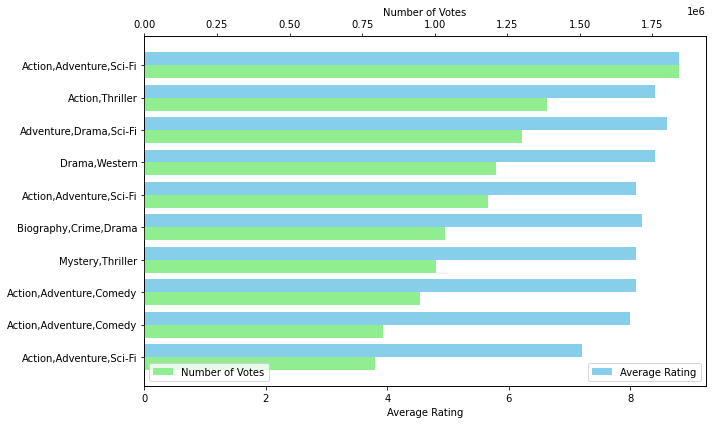

In [27]:
# Sort the DataFrame by number of votes 
votes_and_ratings_sorted_df = votes_and_ratings_df.sort_values('numvotes', ascending=False)

#select the top 10 genres
top_genres = votes_and_ratings_sorted_df.head(10)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twiny()

# Create the bidirectional bar chart
bar_width = 0.4
bar_spacing = 0.2
indices = np.arange(len(top_genres))
rating_bars = ax1.barh(indices - bar_spacing, top_genres['averagerating'], bar_width, label='Average Rating', color='skyblue')
votes_bars = ax2.barh(indices + bar_spacing, top_genres['numvotes'], bar_width, label='Number of Votes', color='lightgreen')

# Set y-axis labels and ticks
ax1.set_yticks(indices)
ax1.set_yticklabels(top_genres['genres'])
ax1.invert_yaxis()

# Set x-axis labels
ax1.set_xlabel('Average Rating')
ax2.set_xlabel('Number of Votes')

# Set legends
ax1.legend(loc='lower right')
ax2.legend(loc='lower left')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

From the bar chart above, we can see that some genre sets appear more that once which is not an accurate representation of the data and does not answer the question in the right way.

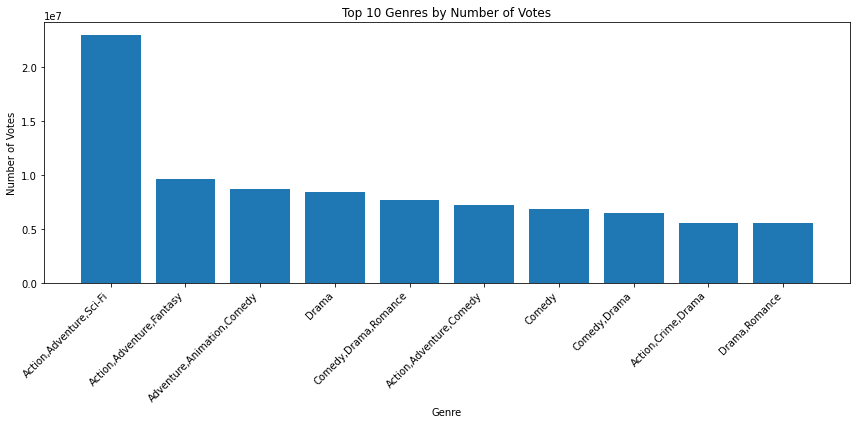

In [28]:
# Create a dictionary that will contain the genres appearing once and the total number of votes
genres_dict = {}
for _, row in votes_df.iterrows():
    genres = row['genres']
    num_votes = row['numvotes']
    if genres in genres_dict:
        genres_dict[genres] += num_votes
    else:
        genres_dict[genres] = num_votes
        
#sort the dictionary in descending order of number of votes
sorted_genres = sorted(genres_dict.items(), key=lambda x:x[1], reverse=True)
# the output is a list of tuples

# Extract the Top 10 Genres and plot them
top_10_genres = sorted_genres[:10]
genres, num_votes = zip(*top_10_genres)
#using the zip function with * to unpack the tuples in the sorted list
# allows us to separate the genres and votes into separate lists

#creat a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, num_votes)
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Top 10 Genres by Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above analysis, the genres with the highest rating are Action, Adventure and Sci-Fi. 

### Relationship Between Budget and Movie Success
The measure of movie success in this question is done by calculating the profit. Adding the worldwide gross and the domestic gross, then subtracting the production budget from the sum.

In [29]:
# Measuring performance using profit.
# Calculate profit using production_budget, domestic_gross, and worldwide_gross
budget_df['profit'] = budget_df['domestic_gross'] + budget_df['worldwide_gross'] - budget_df['production_budget']

# Print the updated DataFrame
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


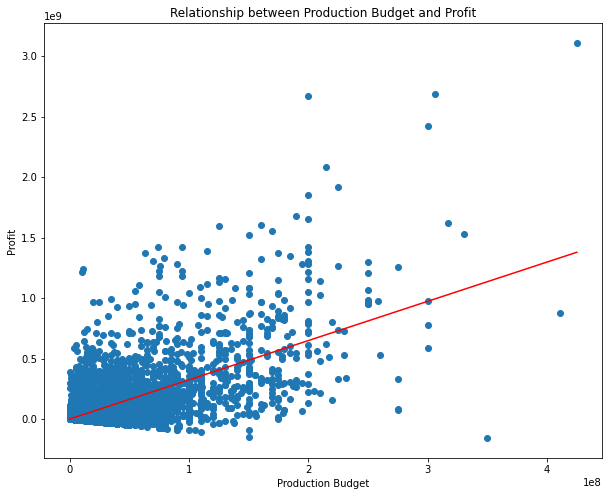

In [30]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(budget_df['production_budget'], budget_df['profit'])
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.title('Relationship between Production Budget and Profit')

# Add a trendline
z = np.polyfit(budget_df['production_budget'], budget_df['profit'], 1)
p = np.poly1d(z)
plt.plot(budget_df['production_budget'], p(budget_df['production_budget']), color='red')

# Show the plot
plt.show()

In [31]:
#Calculate the correlation 
correlation_profit = budget_df['production_budget'].corr(budget_df['profit'])
print(f"The correlation between the production budget and the profit is {correlation_profit}")

The correlation between the production budget and the profit is 0.6435798749670003


The scatter plot above shows a moderate correlation between the production budget and the profit. From this analysis we can conclude that a higher production budget is more likely to return greater profit for the film

In [32]:
#create a dataframe with production budget and profit
prodxprof = budget_df[['movie', 'production_budget', 'profit']].sort_values(by='profit', ascending=False)
prodxprof.head()

,movie,production_budget,profit
0,Avatar,425000000,3111852904
5,Star Wars Ep. VII: The Force Awakens,306000000,2683973445
42,Titanic,200000000,2667572339
6,Avengers: Infinity War,300000000,2426949682
33,Jurassic World,215000000,2086125489


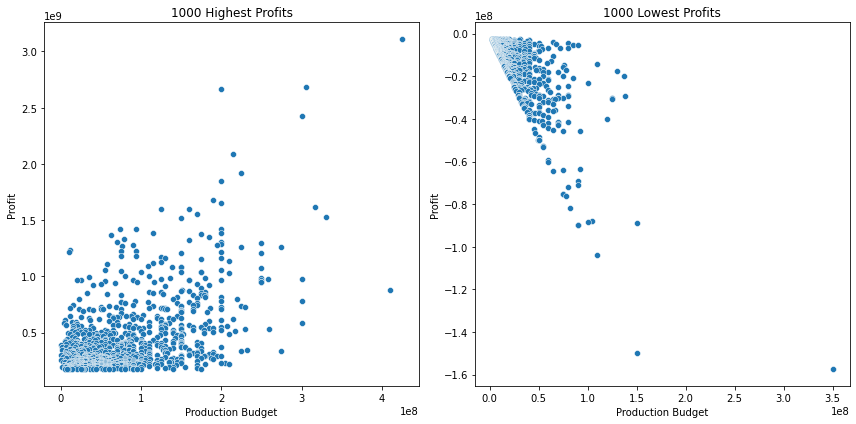

In [33]:
# Sort the dataFrame by profit in descending order
sorted_profits = prodxprof.sort_values('profit', ascending=False)

# Extract the top 1000 highest profits
top_1000_high_profits = sorted_profits.head(1000)

# Extract the top 1000 lowest profits
top_1000_low_profits = sorted_profits.tail(1000)

# Create subplots with two graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph: 1000 highest profits
sns.scatterplot(ax=axes[0], x=top_1000_high_profits['production_budget'], y=top_1000_high_profits['profit'])
axes[0].set_xlabel('Production Budget')
axes[0].set_ylabel('Profit')
axes[0].set_title('1000 Highest Profits')

# Plot the second graph: 1000 lowest profits
sns.scatterplot(ax=axes[1], x=top_1000_low_profits['production_budget'], y=top_1000_low_profits['profit'])
axes[1].set_xlabel('Production Budget')
axes[1].set_ylabel('Profit')
axes[1].set_title('1000 Lowest Profits')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

However from the 2 scatter plots above we can see that a general idea of a moderately positive correlation might not be accurate because of the data presented from the 1000 lowest profits. For some movies, as the production budget increased, the profit decreased and therefore there is no particular budget range that yields more profits. This observation leads to us analyze other aspects of the film industry data that can guide us in making a better conclusion.

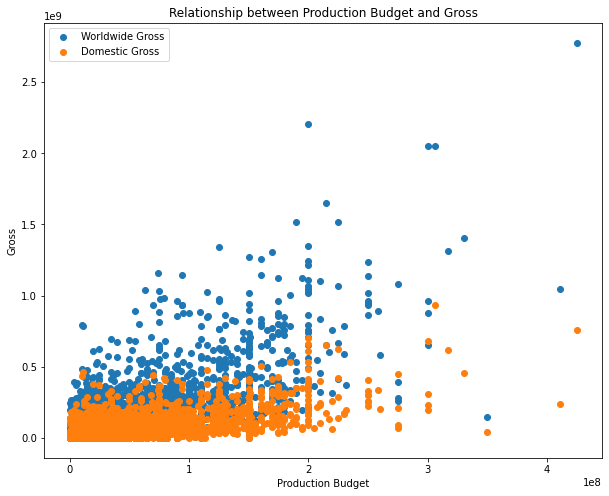

In [34]:
# Visualize the relationship between production budget and gross types
plt.figure(figsize=(10, 8))
plt.scatter(budget_df['production_budget'], budget_df['worldwide_gross'], label='Worldwide Gross')
plt.scatter(budget_df['production_budget'], budget_df['domestic_gross'], label='Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Gross')
plt.title('Relationship between Production Budget and Gross')
plt.legend()
plt.show()

In [35]:
correlation_domestic = budget_df['production_budget'].corr(budget_df['domestic_gross'])
correlation_worldwide = budget_df['production_budget'].corr(budget_df['worldwide_gross'])


print(f"""The correlation between domestic gross and the production budget is {correlation_domestic} 
while the correlation between worldwide gross and the production budget is {correlation_worldwide}. 
From this and the scatter plot above we can see that the production budget has a more positive correlation with the worldwide gross than the domestic gross. 
A conclusion can be drawn stating that films produced are more likely to do better worldwide than domestically.
Making this the target market will aid in the success of the new studio.""")

The correlation between domestic gross and the production budget is 0.6856818396752733 
while the correlation between worldwide gross and the production budget is 0.7483059765694753. 
From this and the scatter plot above we can see that the production budget has a more positive correlation with the worldwide gross than the domestic gross. 
A conclusion can be drawn stating that films produced are more likely to do better worldwide than domestically.
Making this the target market will aid in the success of the new studio.


### Release Period Vs Performance
Calculating the average profit for the year in halves, the first(January to June) and the second(July to December)


In [36]:
#Create a new column with the month
budget_df['month'] = budget_df['release_date'].dt.month
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,12


In [37]:
#create a new dataframe with the months of the year and the average profit for each half of the year
avg_prof_date = budget_df.groupby(budget_df['month'].apply(lambda x: 'Jan-Jun' if x <= 6 else 'Jul-Dec'))['profit'].mean()
avg_prof_date_df = pd.DataFrame(avg_prof_date).reset_index()
avg_prof_date_df['profit'] = avg_prof_date_df['profit'].astype('int64')
avg_prof_date_df

,month,profit
0,Jan-Jun,106588400
1,Jul-Dec,97976439


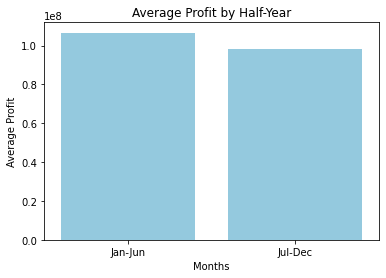

In [38]:
#create a bar graph using seaborn
sns.barplot(x='month', y='profit', data=avg_prof_date_df, color = 'skyblue')
plt.xlabel('Months')
plt.ylabel('Average Profit')
plt.title('Average Profit by Half-Year')
plt.show()

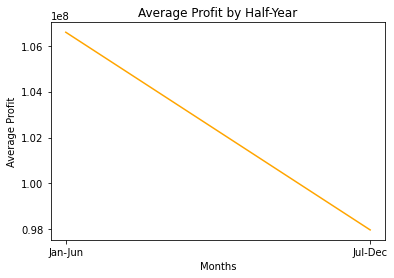

In [46]:
sns.lineplot(x='month', y='profit', data=avg_prof_date_df, color = 'orange')
plt.xlabel('Months')
plt.ylabel('Average Profit')
plt.title('Average Profit by Half-Year')
plt.show()

The release period affects the performance of films. From the above analysis, statistics show that films released in the first half of the year have a higher average profit than films released in the later half of the year. The trend over the months of the year show that the average profit decreases. 

### Audience Rating Vs Perfomance
Calculating this correlation using the movie popularity and the profit

In [39]:
#create a dataframe with title and popularity
popularity_df = tm_df[['title', 'popularity']].sort_values(by='popularity', ascending=False)
popularity_df.head()

,title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289


In [40]:
# rename column in dataframe
popularity_df.rename(columns = {'title' : 'movie'}, inplace = True)
popularity_df.head()

,movie,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289


In [41]:
#create dataframe with profit and movie
profit_df = budget_df[[ 'movie', 'profit']].sort_values(by='profit', ascending=False)
profit_df.head()

,movie,profit
0,Avatar,3111852904
5,Star Wars Ep. VII: The Force Awakens,2683973445
42,Titanic,2667572339
6,Avengers: Infinity War,2426949682
33,Jurassic World,2086125489


In [42]:
# merge the small dataframes created above
popxprof = pd.merge(popularity_df, profit_df, on='movie')
popxprof.head()

,movie,popularity,profit
0,Avengers: Infinity War,80.773,2426949682
1,John Wick,78.123,89272836
2,The Hobbit: The Battle of the Five Armies,53.783,950697409
3,The Avengers,50.289,1916215444
4,The Avengers,50.289,11970832


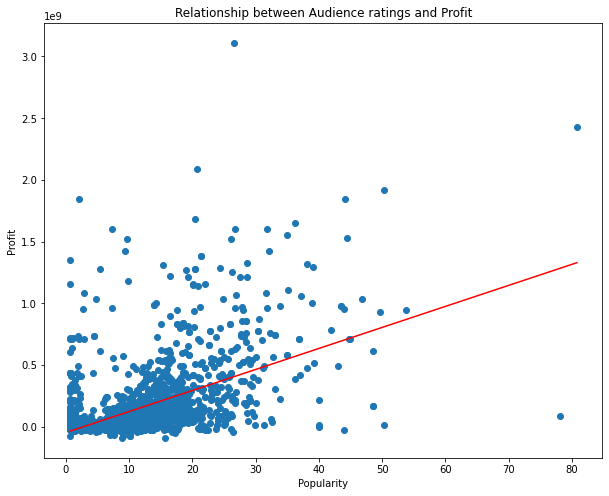

In [43]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(popxprof['popularity'], popxprof['profit'])
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.title('Relationship between Audience ratings and Profit')

# Add a trendline
z = np.polyfit(popxprof['popularity'], popxprof['profit'], 1)
p = np.poly1d(z)
plt.plot(popxprof['popularity'], p(popxprof['popularity']), color='red')

# Show the plot
plt.show()

In [44]:
#Calculate the correlation between the popularity and profit
correlation_popularity = popxprof['popularity'].corr(popxprof['profit'])
print(f"""The analysis of the movie popularity and the profit shows a moderately positive correlation, 
{correlation_popularity} between the two variables.
This means that popular films are more likely to do better and return higher profits""")

The analysis of the movie popularity and the profit shows a moderately positive correlation, 
0.5353726817334188 between the two variables.
This means that popular films are more likely to do better and return higher profits


### Summary 

- By analyzing the number of votes for each genre or set of genres, I was able to determine the the genres with the highest number of votes. I used number of votes because the average ratings can be subjective while the number of votes is the total number of people that voted positively for a genre.

- I examined the relationship between the production budget allocated to a film and its performance. This analysis helped me determine if higher-budget films tend to generate a higher profit, or if there is a particular budget range that yields the best results and thus visualizing this relationship using scatter plots.
 
- I explored the impact of the release period (e.g., month, season) on a film's success. By analyzing profit trends over time, I was able to identify if certain months or seasons are more favorable for film releases. 
 
- I examined the relationship between audience ratings(movie popularity) and movie success. By analyzing the correlation between these variables,I was bale to understand if films with higher ratings tend to perform better financially furthermore, visualizing this relationship using scatter plots.

- In conclusion, all these findings prompt me to recommend that the new movie studio focus of producing high quality films within the genres action, adventure and sci-fi, allocate a sufficient budget for movie production and target worldwide markets, research and carefully plan release dates for films to be earlier in the year and finally, prioritize audience engagement in oder to enhance their popularity.